Let understand the K-Means Clustering first:

-used to group large numbers of raw data

-For the datas you dont have to predefining step

-Its unspervised learning model

-Its so common model in the unspervised models

-It used centroid system during proccessing



Before grouping the raw data, you need to tell how many groups you will do.

K meaning -> About the Centroiding, its not like the K-Neares Neighbour method.

The algorithm be like :

1- K Centroids are selected

<img src="124px-K_Means_Example_Step_1.svg.png">

2- Includes each data in its closest centroid group

<img src="139px-K_Means_Example_Step_2.svg.png">

3- Recalculates the center of each centroid by looking at the center of the points in its group,   and  puts the centroid at the new center location

<img src="139px-K_Means_Example_Step_2.svg.png">

4- Repeating the 2 and 3 steps until the be unchangeable

<img src="139px-K_Means_Example_Step_3.svg.png">

5- center of centroids does not change anymore so it ends grouping

<img src="139px-K_Means_Example_Step_4.svg.png">

When the grouping process is finished, when a new data arrives, the nearest centroid is checked.

When we define the K value, We are checking the elbow of the graphics, its like ledge on the corner.

<img src="elbowmethod.png">

In [3]:
import numpy
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


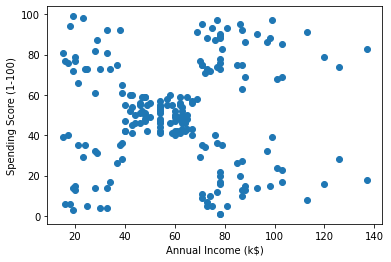

In [7]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Veri setimize bir göz atalım:

In [8]:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

In [9]:
#In this problem im using the sklearn minmaxscaler func. for normalization
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [10]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [56]:
#Let determine the K value with elbow method

k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df[['income','score']])
    list_dist.append(kmeans_model.inertia_)

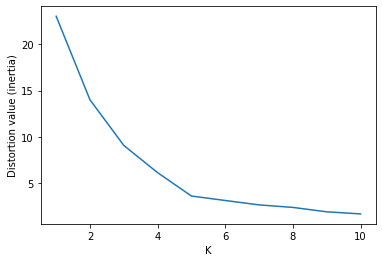

In [62]:
plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [67]:
#Elbow ledge is beetween 4 and 6 ,we can say K=5
Kmeans_model = KMeans(n_clusters = 5)
y_predicted = Kmeans_model.fit_predict(df[['income','score']])
y_predicted

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [71]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster,cluster1
0,1,0.000000,0.387755,4,0
1,2,0.000000,0.816327,2,4
2,3,0.008197,0.051020,4,0
3,4,0.008197,0.775510,2,4
4,5,0.016393,0.397959,4,0


In [74]:
#let we see centroids
Kmeans_model.cluster_centers_   

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

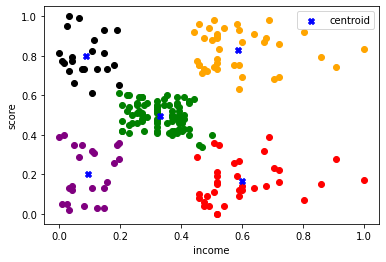

In [77]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()